# 강남구 공모전 데이터 전처리

## 데이터 설명 (모범음식점 신청 데이터)

|출력명|출력설명|
|:--:|:--:|
|CGG_CODE|시군구코드|
|ASGN_YY|지정년도|
|ASGN_SNO|지정번호|
|APPL_YMD|신청일자|
|ASGN_YMD|지정일자|
|ASGN_CANCEL_YMD|취소일자|
|IPSB_YMD|불가일자|
|UPSO_NM|업소명|
|SITE_ADDR_RD|소재지도로명|
|SITE_ADDR|소재지지번|
|PERM_NT_NO|허가(신고)번호|
|SNT_UPTAE_NM|업태명|
|MAIN_EDF|주된음식|
|TRDP_AREA|영업장면적(㎡)|
|ADMDNG_NM|행정동명|
|GRADE_FACIL_GBN|급수시설구분|

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

from datetime import datetime
from datetime import timedelta

pd.set_option('display.max_columns', None) # 데이터프레임 모든 열 출력

import warnings
warnings.filterwarnings(action='ignore')

In [278]:
# seaborn 시각화 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [279]:
# pickle load
with open('data/result.pkl', 'rb') as f:
    data = pickle.load(f)

In [280]:
# pickle 파일에서 모범음식점 지정, 신청, 취소 데이터프레임 각각 선언
assigned_df = data["data"]["지정"]
applied_df = data["data"]["신청"]
canceled_df = data["data"]["취소"]

In [281]:
assigned_df.head(3)

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN,UPSO_SITE_TELNO
0,3220000,2014,0160,20141006,20141006,이도곰탕,"서울특별시 강남구 논현로94길 29-5, 지상1층,지상2층 (역삼동)",서울특별시 강남구 역삼동 671번지 17호,3220000-101-2001-24197,한식,곰탕,194.41,역삼1동,상수도전용,02 5010738
1,3220000,2021,139,20181001,20211116,솥내음 스타필드 코엑스몰점,"서울특별시 강남구 영동대로 513, 코엑스 지하1층 O-107호 (삼성동)",서울특별시 강남구 삼성동 159번지 코엑스,3220000-101-2020-00643,한식,직화불백,74.56,삼성1동,,
2,3220000,2010,0024,20100210,20100210,스시히로바,"서울특별시 강남구 삼성로 620, 블래스톤리조트 지상1층 (삼성동)",서울특별시 강남구 삼성동 70번지 블래스톤리조트,3220000-101-2002-00383,일식,초밥,216.56,삼성1동,상수도전용,02 5155511


In [282]:
applied_df.head(3)

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,IPSB_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN
0,3220000,2010,0012,20100210,20100210,20151106,,고수,"서울특별시 강남구 논현로149길 12, (논현동,지상1층)",서울특별시 강남구 논현동 7번지 9호 지상1층,3220000-101-2009-00214,한식,,92.40,논현1동,
1,3220000,2014,0160,20141006,20141006,,,이도곰탕,"서울특별시 강남구 논현로94길 29-5, 지상1층,지상2층 (역삼동)",서울특별시 강남구 역삼동 671번지 17호,3220000-101-2001-24197,한식,곰탕,194.41,역삼1동,상수도전용
2,3220000,2021,139,20181001,20211116,,,솥내음 스타필드 코엑스몰점,"서울특별시 강남구 영동대로 513, 코엑스 지하1층 O-107호 (삼성동)",서울특별시 강남구 삼성동 159번지 코엑스,3220000-101-2020-00643,한식,직화불백,74.56,삼성1동,


In [283]:
canceled_df.head(3)

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,ASGN_CANCEL_WHY,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN
0,3220000,2010,0012,20100210,20100210,20151106,고수,"서울특별시 강남구 논현로149길 12, (논현동,지상1층)",서울특별시 강남구 논현동 7번지 9호 지상1층,3220000-101-2009-00214,한식,영업주 변경(미지정),,92.40,논현1동,
1,3220000,2016,0133,20161125,20161125,20191128,두어마리,"서울특별시 강남구 봉은사로114길 38, (삼성동)",서울특별시 강남구 삼성동 166번지 3호,3220000-101-1995-14693,한식,평가점수 미달(50점),순두부,79.97,삼성1동,상수도전용
2,3220000,2000,0075,20001001,20001130,20050203,한교방 서울면옥,"서울특별시 강남구 학동로45길 8, (논현동)",서울특별시 강남구 논현동 117번지 8호,3220000-101-1993-20364,한식,영업자지위승계,정식,119.68,논현2동,상수도전용


In [284]:
print(assigned_df.shape)
print(applied_df.shape)
print(canceled_df.shape)

(316, 15)
(713, 16)
(385, 16)


In [285]:
applied_df.shape[0] - canceled_df.shape[0]

328

### `info()`, `describe()` 확인

In [286]:
applied_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CGG_CODE         713 non-null    object 
 1   ASGN_YY          713 non-null    object 
 2   ASGN_SNO         713 non-null    object 
 3   APPL_YMD         713 non-null    object 
 4   ASGN_YMD         713 non-null    object 
 5   ASGN_CANCEL_YMD  713 non-null    object 
 6   IPSB_YMD         713 non-null    object 
 7   UPSO_NM          713 non-null    object 
 8   SITE_ADDR_RD     713 non-null    object 
 9   SITE_ADDR        713 non-null    object 
 10  PERM_NT_NO       713 non-null    object 
 11  SNT_UPTAE_NM     713 non-null    object 
 12  MAIN_EDF         713 non-null    object 
 13  TRDP_AREA        713 non-null    float64
 14  ADMDNG_NM        713 non-null    object 
 15  GRADE_FACIL_GBN  713 non-null    object 
dtypes: float64(1), object(15)
memory usage: 89.2+ KB


In [287]:
applied_df.describe(include="all")

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,IPSB_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN
count,713,713,713,713,713,713,713,713,713,713,713,713,713,713.000000,713,713
unique,1,19,317,45,29,67,2,641,639,622,649,14,282,NaN,23,2
top,3220000,2010,0061,20100210,20100210,,,평양면옥,,서울특별시 강남구 삼성동 159번지,3220000-101-1986-19340,한식,,NaN,역삼1동,상수도전용
freq,713,310,29,270,268,325,710,4,4,7,3,445,194,NaN,146,553
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.499116,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.157464,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.440000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.900000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.230000,NaN,NaN


In [288]:
# 중복 확인
applied_df[applied_df.duplicated()]

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,IPSB_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN


### 데이터 타입 변경

In [289]:
# 신청 연도, 지정 연도, 취소 연도 datetime으로 데이터타입 변경

date_list = ["APPL_YMD", "ASGN_YMD", "ASGN_CANCEL_YMD"]

for col in date_list:
    applied_df[f"{col}_DATE"] = pd.to_datetime(applied_df[col])
    # applied_df[f"{col}_YEAR"] = pd.to_datetime(applied_df[col], errors='coerce').dt.year.astype(object)
    applied_df[f"{col}_YEAR"] = pd.to_datetime(applied_df[col], errors='coerce').dt.strftime('%Y')


applied_df.head(3)

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,IPSB_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN,APPL_YMD_DATE,APPL_YMD_YEAR,ASGN_YMD_DATE,ASGN_YMD_YEAR,ASGN_CANCEL_YMD_DATE,ASGN_CANCEL_YMD_YEAR
0,3220000,2010,0012,20100210,20100210,20151106,,고수,"서울특별시 강남구 논현로149길 12, (논현동,지상1층)",서울특별시 강남구 논현동 7번지 9호 지상1층,3220000-101-2009-00214,한식,,92.40,논현1동,,2010-02-10,2010,2010-02-10,2010,2015-11-06,2015
1,3220000,2014,0160,20141006,20141006,,,이도곰탕,"서울특별시 강남구 논현로94길 29-5, 지상1층,지상2층 (역삼동)",서울특별시 강남구 역삼동 671번지 17호,3220000-101-2001-24197,한식,곰탕,194.41,역삼1동,상수도전용,2014-10-06,2014,2014-10-06,2014,NaT,NaN
2,3220000,2021,139,20181001,20211116,,,솥내음 스타필드 코엑스몰점,"서울특별시 강남구 영동대로 513, 코엑스 지하1층 O-107호 (삼성동)",서울특별시 강남구 삼성동 159번지 코엑스,3220000-101-2020-00643,한식,직화불백,74.56,삼성1동,,2018-10-01,2018,2021-11-16,2021,NaT,NaN


### 결측치 확인

In [316]:
# 연도별 지정 업소 개수
# → 지정 연도가 비어있는 업소들이 존재
applied_df.groupby(["ASGN_YY"]).count()[["UPSO_NM"]]

,UPSO_NM
ASGN_YY,
,12
2000,8
2001,1
2002,27
2003,2
2004,2
2009,2
2010,310
2011,6


In [291]:
# 지정 연도가 비어있는 업소 리스트
applied_df[applied_df.ASGN_YY == ""]["UPSO_NM"]

98     일치프리아니 현대무역센터점
101             태영생막창
129               아리산
222           한방정통삼계탕
247                만요
251            (주)곰바위
360            울돌목가는길
485         주식회사 우미노히
550              본가식당
552              고향식당
553              강남고을
703            청담 뚝배기
Name: UPSO_NM, dtype: object

In [292]:
applied_df[applied_df.ASGN_YY == ""]

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,IPSB_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN,APPL_YMD_DATE,APPL_YMD_YEAR,ASGN_YMD_DATE,ASGN_YMD_YEAR,ASGN_CANCEL_YMD_DATE,ASGN_CANCEL_YMD_YEAR
98,3220000,,,20100210,,20120706,,일치프리아니 현대무역센터점,"서울특별시 강남구 테헤란로 517, 지상10층 (삼성동, 현대백화점)",서울특별시 강남구 삼성동 159번지 7호,3220000-101-2006-00588,경양식,,143.40,삼성1동,상수도전용,2010-02-10,2010,NaT,NaN,2012-07-06,2012
101,3220000,,,20171010,,,,태영생막창,"서울특별시 강남구 논현로38길 18, 지상1층 (도곡동)",서울특별시 강남구 도곡동 412번지 5호 지상1층,3220000-101-2014-00147,한식,,91.67,도곡1동,,2017-10-10,2017,NaT,NaN,NaT,NaN
129,3220000,,,20171010,,,,아리산,"서울특별시 강남구 언주로71길 11, (역삼동,지상1층)",서울특별시 강남구 역삼동 774번지 46호 지상1층,3220000-101-2006-00295,중국식,,134.38,역삼2동,상수도전용,2017-10-10,2017,NaT,NaN,NaT,NaN
222,3220000,,,20171010,,,,한방정통삼계탕,"서울특별시 강남구 테헤란로81길 35, (삼성동)",서울특별시 강남구 삼성동 156번지 8호,3220000-101-1990-18389,한식,삼계탕,109.34,삼성1동,상수도전용,2017-10-10,2017,NaT,NaN,NaT,NaN
247,3220000,,,20100210,,20171124,,만요,"서울특별시 강남구 언주로 640, (논현동)",서울특별시 강남구 논현동 248번지 7호,3220000-101-1989-07862,일식,,668.74,논현2동,상수도전용,2010-02-10,2010,NaT,NaN,2017-11-24,2017
251,3220000,,,20080530,,,,(주)곰바위,"서울특별시 강남구 삼성로 542, (삼성동,지하1층,지상1층)","서울특별시 강남구 삼성동 151번지 4호 지하1층,지상1층",3220000-101-2007-00782,한식,,432.16,삼성1동,상수도전용,2008-05-30,2008,NaT,NaN,NaT,NaN
360,3220000,,,20100210,,20171124,,울돌목가는길,"서울특별시 강남구 삼성로 566, (삼성동)",서울특별시 강남구 삼성동 145번지 18호,3220000-101-1992-15700,한식,,441.76,삼성1동,상수도전용,2010-02-10,2010,NaT,NaN,2017-11-24,2017
485,3220000,,,20171010,,,,주식회사 우미노히,"서울특별시 강남구 도산대로89길 12, (청담동,지상1층 104호)",서울특별시 강남구 청담동 125번지 0호 지상1층 104호,3220000-101-2007-00164,일식,,51.01,청담동,상수도전용,2017-10-10,2017,NaT,NaN,NaT,NaN
550,3220000,,,20171010,,,20171124,본가식당,"서울특별시 강남구 선릉로96길 13, (삼성동)",서울특별시 강남구 삼성동 140번지 16호,3220000-101-1992-15670,한식,한식,55.25,삼성2동,상수도전용,2017-10-10,2017,NaT,NaN,NaT,NaN
552,3220000,,,20171010,,,20171124,고향식당,"서울특별시 강남구 학동로101길 26, 삼익상가 지하1층 59,60호 (청담동)",서울특별시 강남구 청담동 134번지 20호,3220000-101-2014-00672,한식,,52.89,청담동,,2017-10-10,2017,NaT,NaN,NaT,NaN


In [311]:
applied_df[applied_df.ASGN_YY == ""].shape

(12, 22)

In [322]:
# 모범음식점 신청 데이터셋 row 숫자 - 취소 데이터셋 row 숫자 - 지정 데이터셋 row 숫자 = 12 (지정연도 빈칸인 숫자와 동일)
applied_df.shape[0] - canceled_df.shape[0] - assigned_df.shape[0]

12

In [319]:
canceled_df[canceled_df.UPSO_NM=="일치프리아니 현대무역센터점"]

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,ASGN_CANCEL_WHY,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN


In [320]:
canceled_df[canceled_df.UPSO_NM=="만요"]

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,ASGN_CANCEL_WHY,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN


In [321]:
canceled_df[canceled_df.UPSO_NM=="울돌목가는길"]

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,ASGN_CANCEL_WHY,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN


In [314]:
applied_df[applied_df.IPSB_YMD != ""]

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,IPSB_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN,APPL_YMD_DATE,APPL_YMD_YEAR,ASGN_YMD_DATE,ASGN_YMD_YEAR,ASGN_CANCEL_YMD_DATE,ASGN_CANCEL_YMD_YEAR
550,3220000,,,20171010,,,20171124,본가식당,"서울특별시 강남구 선릉로96길 13, (삼성동)",서울특별시 강남구 삼성동 140번지 16호,3220000-101-1992-15670,한식,한식,55.25,삼성2동,상수도전용,2017-10-10,2017,NaT,NaN,NaT,NaN
552,3220000,,,20171010,,,20171124,고향식당,"서울특별시 강남구 학동로101길 26, 삼익상가 지하1층 59,60호 (청담동)",서울특별시 강남구 청담동 134번지 20호,3220000-101-2014-00672,한식,,52.89,청담동,,2017-10-10,2017,NaT,NaN,NaT,NaN
553,3220000,,,20171010,,,20171124,강남고을,"서울특별시 강남구 압구정로 404, (청담동,지상1층)",서울특별시 강남구 청담동 78번지 16호 지상1층,3220000-101-2005-00847,경양식,한식,80.60,청담동,상수도전용,2017-10-10,2017,NaT,NaN,NaT,NaN


In [303]:
# 모범음식점 신청 데이터 중, 업소 이름이 중복인 것 따로 applied_dup에 선언
apply_upso_dup = applied_df[applied_df.duplicated(subset=["UPSO_NM"], keep=False)]
apply_upso_dup.head(3)

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,IPSB_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN,APPL_YMD_DATE,APPL_YMD_YEAR,ASGN_YMD_DATE,ASGN_YMD_YEAR,ASGN_CANCEL_YMD_DATE,ASGN_CANCEL_YMD_YEAR
8,3220000,2000,0075,20001001,20001130,20050203,,한교방 서울면옥,"서울특별시 강남구 학동로45길 8, (논현동)",서울특별시 강남구 논현동 117번지 8호,3220000-101-1993-20364,한식,정식,119.68,논현2동,상수도전용,2000-10-01,2000,2000-11-30,2000,2005-02-03,2005
9,3220000,2010,0005,20100210,20100210,20110823,,한교방 서울면옥,"서울특별시 강남구 학동로45길 8, (논현동)",서울특별시 강남구 논현동 117번지 8호,3220000-101-1993-20364,한식,,119.68,논현2동,상수도전용,2010-02-10,2010,2010-02-10,2010,2011-08-23,2011
16,3220000,2017,474,20171010,20171124,20211116,,윤화돈까스 기사식당,"서울특별시 강남구 도곡로 221, (역삼동,셀라빌딩1층)",서울특별시 강남구 역삼동 787번지 12호 셀라빌딩1층,3220000-101-2011-00213,한식,돈까스,214.50,역삼2동,상수도전용,2017-10-10,2017,2017-11-24,2017,2021-11-16,2021


In [304]:
# applied_dup에서, 지정 연도 공백인 것
apply_upso_dup[apply_upso_dup.ASGN_YY==""]

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,IPSB_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN,APPL_YMD_DATE,APPL_YMD_YEAR,ASGN_YMD_DATE,ASGN_YMD_YEAR,ASGN_CANCEL_YMD_DATE,ASGN_CANCEL_YMD_YEAR
251,3220000,,,20080530,,,,(주)곰바위,"서울특별시 강남구 삼성로 542, (삼성동,지하1층,지상1층)","서울특별시 강남구 삼성동 151번지 4호 지하1층,지상1층",3220000-101-2007-00782,한식,,432.16,삼성1동,상수도전용,2008-05-30,2008,NaT,NaN,NaT,NaN
485,3220000,,,20171010,,,,주식회사 우미노히,"서울특별시 강남구 도산대로89길 12, (청담동,지상1층 104호)",서울특별시 강남구 청담동 125번지 0호 지상1층 104호,3220000-101-2007-00164,일식,,51.01,청담동,상수도전용,2017-10-10,2017,NaT,NaN,NaT,NaN


In [305]:
apply_upso_dup[apply_upso_dup.UPSO_NM=="주식회사 우미노히"]

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,IPSB_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN,APPL_YMD_DATE,APPL_YMD_YEAR,ASGN_YMD_DATE,ASGN_YMD_YEAR,ASGN_CANCEL_YMD_DATE,ASGN_CANCEL_YMD_YEAR
22,3220000,2019,377,20191128,20190930,20211116,,주식회사 우미노히,"서울특별시 강남구 도산대로89길 12, (청담동,지상1층 104호)",서울특별시 강남구 청담동 125번지 0호 지상1층 104호,3220000-101-2007-00164,일식,회,51.01,청담동,상수도전용,2019-11-28,2019,2019-09-30,2019,2021-11-16,2021
485,3220000,,,20171010,,,,주식회사 우미노히,"서울특별시 강남구 도산대로89길 12, (청담동,지상1층 104호)",서울특별시 강남구 청담동 125번지 0호 지상1층 104호,3220000-101-2007-00164,일식,,51.01,청담동,상수도전용,2017-10-10,2017,NaT,NaN,NaT,NaN


In [323]:
apply_upso_dup[apply_upso_dup.UPSO_NM=="(주)곰바위"]

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,IPSB_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN,APPL_YMD_DATE,APPL_YMD_YEAR,ASGN_YMD_DATE,ASGN_YMD_YEAR,ASGN_CANCEL_YMD_DATE,ASGN_CANCEL_YMD_YEAR
54,3220000,2010,0060,20080630,20100210,,,(주)곰바위,"서울특별시 강남구 삼성로 542, (삼성동,지하1층,지상1층)","서울특별시 강남구 삼성동 151번지 4호 지하1층,지상1층",3220000-101-2007-00782,한식,양대창구이,432.16,삼성1동,상수도전용,2008-06-30,2008,2010-02-10,2010,NaT,NaN
251,3220000,,,20080530,,,,(주)곰바위,"서울특별시 강남구 삼성로 542, (삼성동,지하1층,지상1층)","서울특별시 강남구 삼성동 151번지 4호 지하1층,지상1층",3220000-101-2007-00782,한식,,432.16,삼성1동,상수도전용,2008-05-30,2008,NaT,NaN,NaT,NaN


In [306]:
apply_upso_dup[apply_upso_dup.duplicated(subset=["UPSO_NM"], keep=False)].value_counts("UPSO_NM")

UPSO_NM
평양면옥          4
삼호짱뚱이         3
전주명가          3
논현각           3
김수사           3
             ..
산호골           2
셀럽 앤 어？       2
스시마니아         2
(주)도라후구현복집    2
해오름맛집         2
Name: count, Length: 63, dtype: int64

In [298]:
# 신청 연도가 비어있는 업소 중 모범음식점으로 지정되어 있는 업소 필터링 (assigned_df에서 가져옴)
blanks_list = pd.DataFrame(columns=assigned_df.columns)

for upso in applied_df[applied_df.ASGN_YY == ""]["UPSO_NM"]:
    blanks_list = pd.concat([blanks_list, assigned_df[assigned_df.UPSO_NM == upso]])

In [299]:
# 신청 연도가 비어있는 업소 중 모범음식점으로 지정되어 있는 업소 1개 존재
blanks_list

,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN,UPSO_SITE_TELNO
28,3220000,2010,0060,20080630,20100210,(주)곰바위,"서울특별시 강남구 삼성로 542, (삼성동,지하1층,지상1층)","서울특별시 강남구 삼성동 151번지 4호 지하1층,지상1층",3220000-101-2007-00782,한식,양대창구이,432.16,삼성1동,상수도전용,02 552 7761


### 범주형 컬럼 시각화
- 지정 연도, 신청 연도, 취소 연도, 업종, 지역, 급수시설

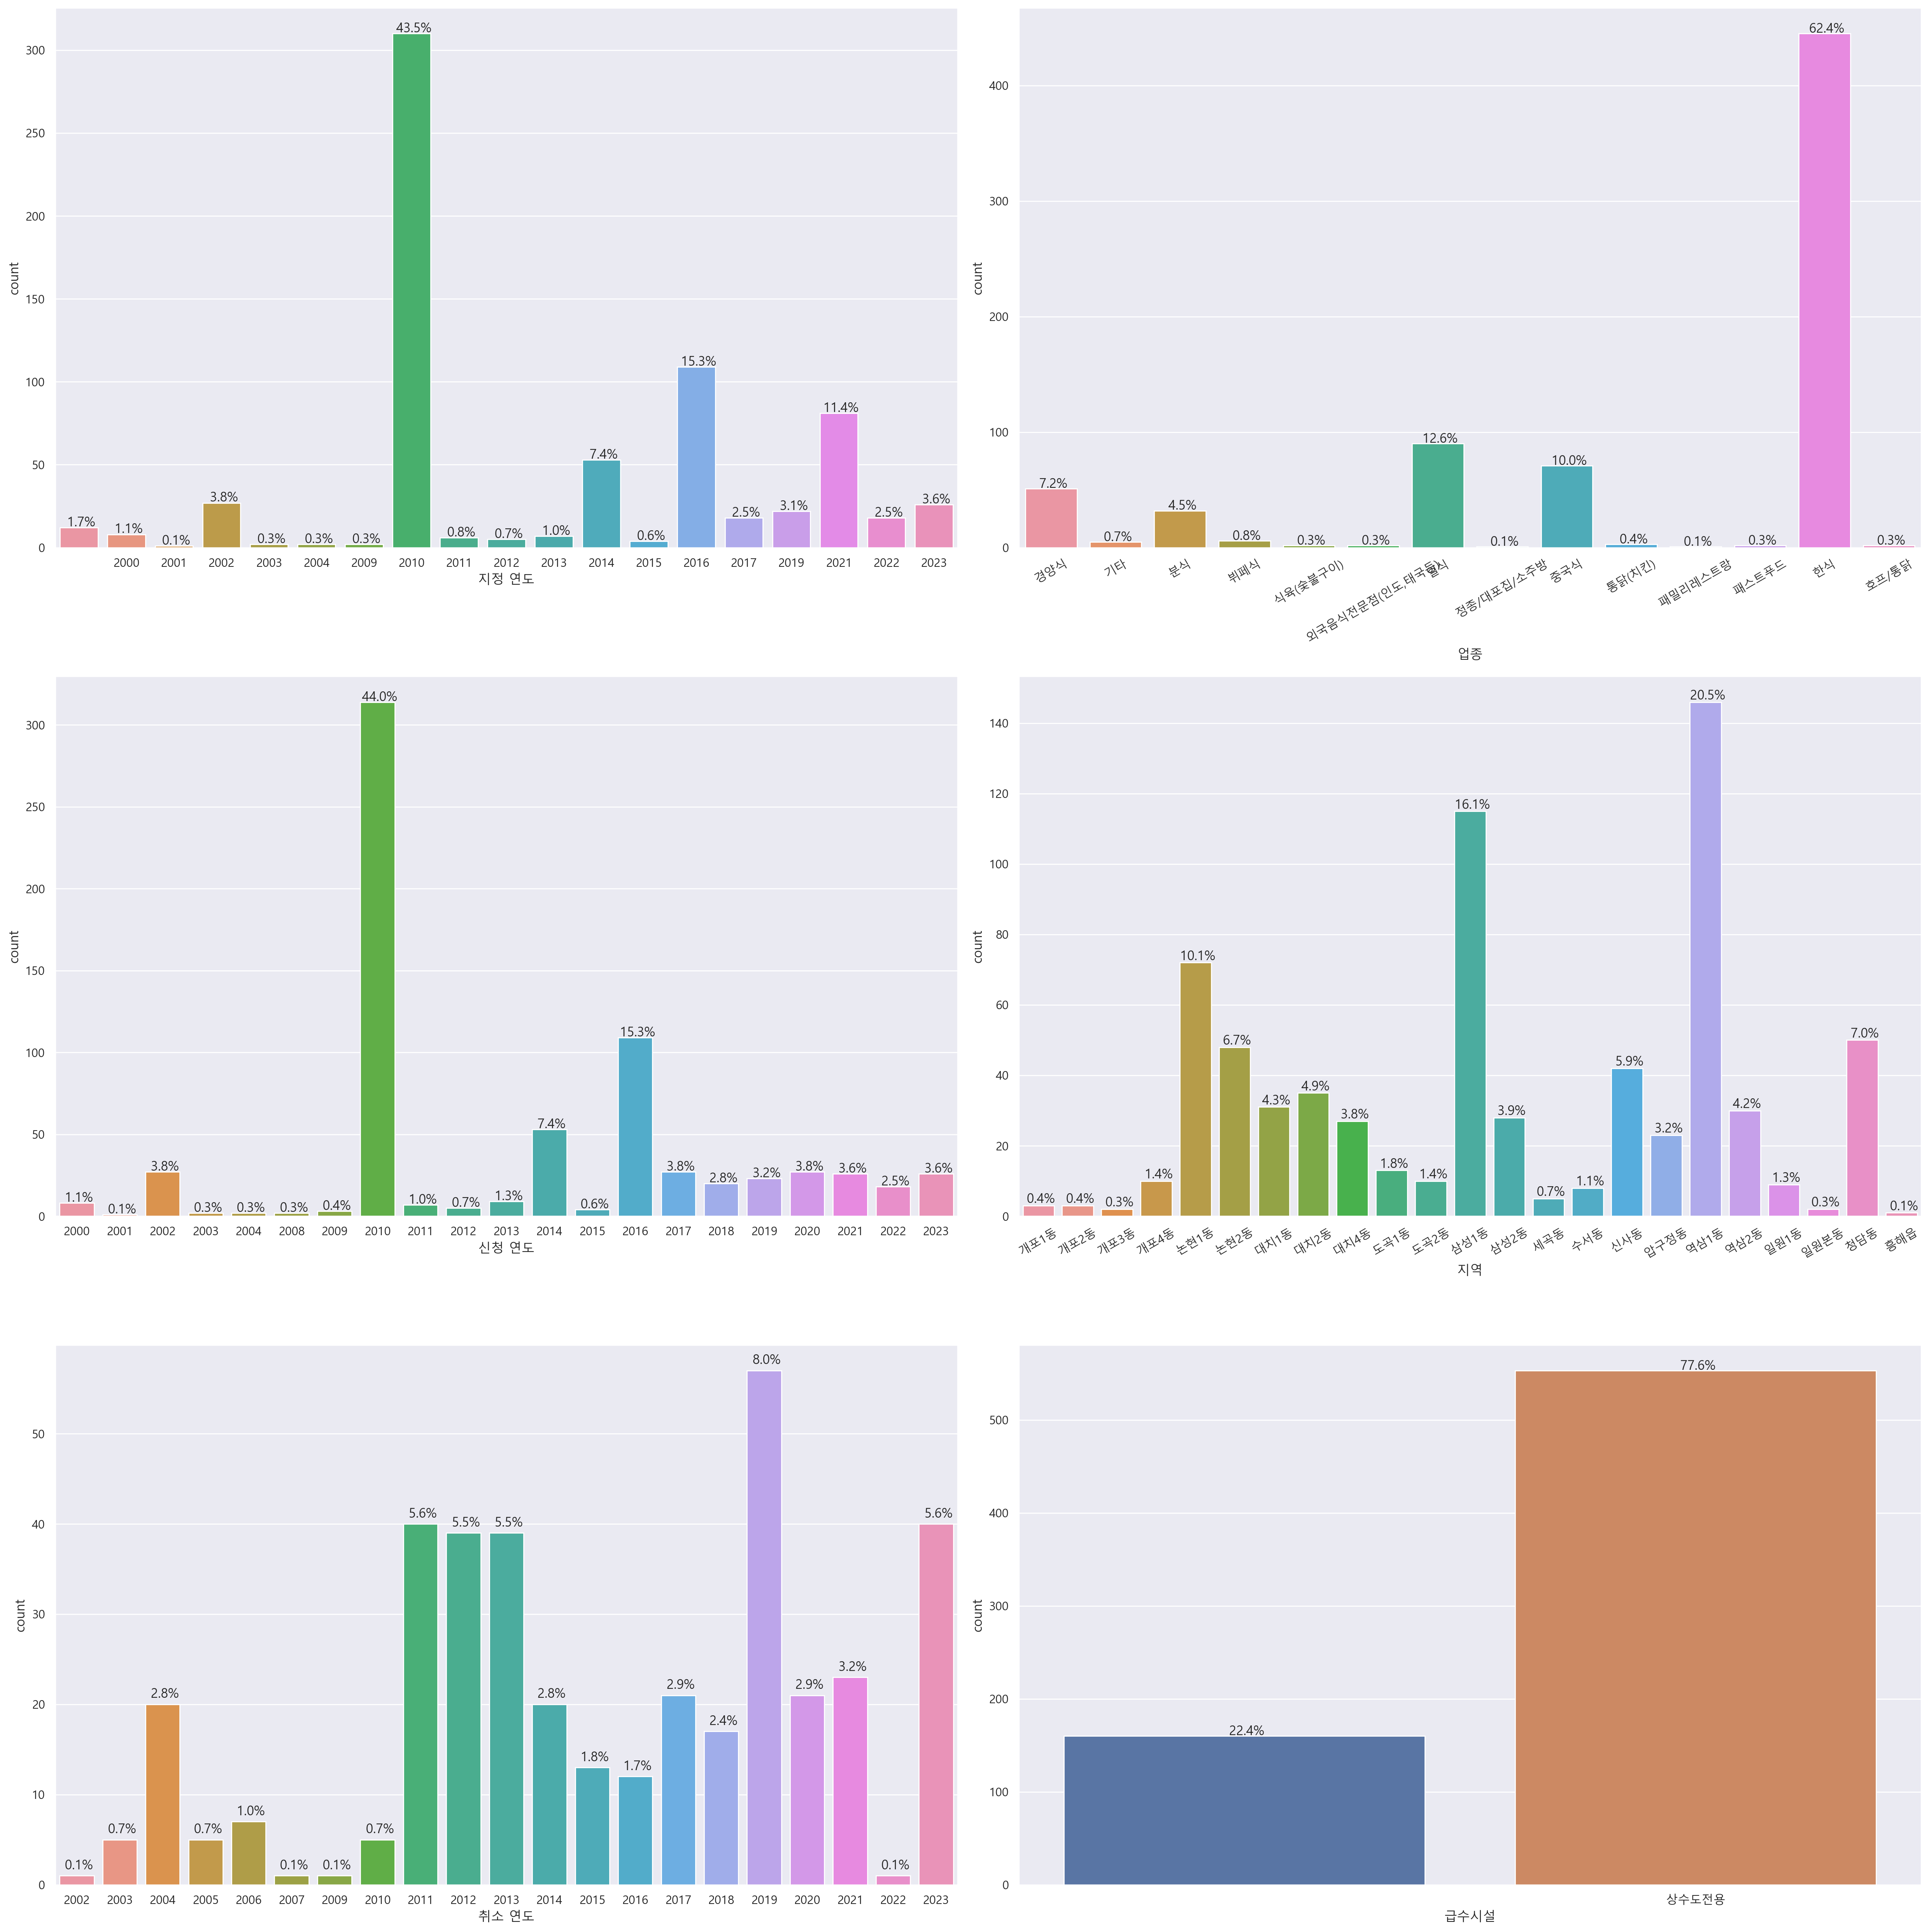

In [301]:
# 연도, 업종, 지역별 모범음식점 시각화

cnt_col_list = ["ASGN_YY", "APPL_YMD_YEAR", "ASGN_CANCEL_YMD_YEAR", "SNT_UPTAE_NM", "ADMDNG_NM", "GRADE_FACIL_GBN"]
# cnt_col_list = ["ASGN_YY", "SNT_UPTAE_NM", "ADMDNG_NM"]

x_list = ["지정 연도", "신청 연도", "취소 연도", "업종", "지역", "급수시설"]

# 범주형 변수 countplot 그려봄
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

# flatten()을 통해axes를 1차원 array로 펴줘야 한다
axes = axes.T.flatten()

for i, (col, ax) in enumerate(zip(cnt_col_list, axes)):
    
    g = sns.countplot(data=applied_df.sort_values(by=col), x=col, ax=ax)
    g.set_xlabel(x_list[i])

    # 각각의 bar에 비율까지 표시
    # https://suy379.tistory.com/148
    for patch in g.patches:
        g.text(x = patch.get_x() + patch.get_width()/2,
                y = patch.get_height() + len(applied_df)*0.001,
                s = f'{(patch.get_height()/len(applied_df))*100: 1.1f}%',
                ha = 'center')
    
    if col in ["SNT_UPTAE_NM", "ADMDNG_NM"]:
        g.set_xticklabels(g.get_xticklabels(), rotation=30)
    else:
        g.set_xticklabels(g.get_xticklabels())
    
fig.tight_layout()
plt.show()

In [325]:
applied_df[applied_df.ADMDNG_NM=="흥해읍"]


,CGG_CODE,ASGN_YY,ASGN_SNO,APPL_YMD,ASGN_YMD,ASGN_CANCEL_YMD,IPSB_YMD,UPSO_NM,SITE_ADDR_RD,SITE_ADDR,PERM_NT_NO,SNT_UPTAE_NM,MAIN_EDF,TRDP_AREA,ADMDNG_NM,GRADE_FACIL_GBN,APPL_YMD_DATE,APPL_YMD_YEAR,ASGN_YMD_DATE,ASGN_YMD_YEAR,ASGN_CANCEL_YMD_DATE,ASGN_CANCEL_YMD_YEAR
565,3220000,2010,0059,20100210,20100210,20161125,,이집밥상,"서울특별시 강남구 압구정로79길 6, 2층 (청담동)",,3220000-101-2004-00404,한식,한식,143.79,흥해읍,상수도전용,2010-02-10,2010,2010-02-10,2010,2016-11-25,2016


## 생각해볼 것
- 데이터셋
    - 신청 - (지정 + 취소) 데이터 수 12개
        - 12개 데이터를 지워야할까?
    - 신청 데이터셋에 지정, 취소 데이터 포함 → 신청 데이터셋으로 확인
- 시각화
    - 모범음식점 신청 및 지정 연도 2010년, 2016년 순으로 가장 많음
    - 취소 연도는 2010년 이후 계속 이루어짐
    - 지역은 역삼1동, 삼성1동 순으로 가장 많다

In [ ]:
# JIRA 테스트용